# AIM - Research Chat Bot (RCH)

## 1.Set-Up

### Check GPU and Memory

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Jun 17 18:32:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime → "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


### Access Permission and Import Data

In [ ]:
#Allow all permissions for access to google drive
from google.colab import drive
drive.mount('/content/drive')
import os
abspath = os.path.abspath('/content/drive/My Drive/E. classmaterial/2024 Ivey MMA/AIM_project') ## String which contains absolute path to the script file
os.chdir(abspath)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.pyplot import imread
import glob
from PIL import Image
from IPython.display import SVG
import sys
import gc #garbage collector

import seaborn as sns
!pip install squarify
import squarify
import re

In [ ]:
#import os
abspath = os.path.abspath('/content/drive/My Drive/E. classmaterial/2024 Ivey MMA/AIM_project') ## String which contains absolute path to the script file
os.chdir(abspath)

## 2.Prepare the Data

### Structure data into Pandas DataFrames

In [ ]:
csv_file= ['customer_satisfactory_survey.csv']

df=[]
for i in range(len(csv_file)):
    df_s = pd.read_csv(csv_file[i],encoding='utf-8')
    df.append(df_s)

#row bind
df=pd.concat(df,axis=0,ignore_index=True)

print(df.shape)

#orig_total=df.shape[0] #122

(122, 21)


In [ ]:
#view first few rows of data
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
# Check the columns
print(df.columns)

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Starbucks?',
       '6. How do you usually enjoy Starbucks?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Starbucks's outlet to you is...?',
       '9. Do you have Starbucks membership card?',
       '10. What do you most frequently purchase at Starbucks?',
       '11. On average, how much would you spend at Starbucks per visit?',
       '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Starbucks?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Starbucks as..',
       '17. How would you rate the service at 

In [ ]:
# Check if any column has missing values
print(df.isnull().sum())

Timestamp                                                                                                                 0
1. Your Gender                                                                                                            0
2. Your Age                                                                                                               0
3. Are you currently....?                                                                                                 0
4. What is your annual income?                                                                                            0
5. How often do you visit Starbucks?                                                                                      0
6. How do you usually enjoy Starbucks?                                                                                    1
7. How much time do you normally  spend during your visit?                                                                0
8. The n

In [ ]:
# check column value and data types

summary = []

for col in df.columns:
    col_dtype = df[col].dtype
    col_summary = {'column': col, 'dtype': str(col_dtype)}

    if col_dtype == 'object':
        unique_vals = df[col].dropna().unique()
        # Preview first 10 unique values
        col_summary['summary'] = unique_vals[:10].tolist() if len(unique_vals) > 10 else unique_vals.tolist()
    elif col_dtype == 'int64':
        col_summary['summary'] = f"Range: {df[col].min()} - {df[col].max()}"
    else:
        col_summary['summary'] = None  # You can handle float, bool, etc., if needed

    summary.append(col_summary)

summary_df = pd.DataFrame(summary)
print(summary_df)


                                               column   dtype  \
0                                           Timestamp  object   
1                                      1. Your Gender  object   
2                                         2. Your Age  object   
3                           3. Are you currently....?  object   
4                      4. What is your annual income?  object   
5                5. How often do you visit Starbucks?  object   
6              6. How do you usually enjoy Starbucks?  object   
7   7. How much time do you normally  spend during...  object   
8     8. The nearest Starbucks's outlet to you is...?  object   
9           9. Do you have Starbucks membership card?  object   
10  10. What do you most frequently purchase at St...  object   
11  11. On average, how much would you spend at St...  object   
12  12. How would you rate the quality of Starbuck...   int64   
13  13. How would you rate the price range at Star...   int64   
14  14. How important are

In [ ]:
distinct_vals = df['19. How do you come to hear of promotions at Starbucks? Check all that apply.'].unique()
print(distinct_vals)

['Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)'
 'Social Media;In Store displays' 'In Store displays;Billboards'
 'Through friends and word of mouth' 'Starbucks Website/Apps;Social Media'
 'Social Media'
 'Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth'
 'Starbucks Website/Apps;Social Media;Through friends and word of mouth'
 'Social Media;Through friends and word of mouth'
 'Social Media;Through friends and word of mouth;In Store displays'
 'Starbucks Website/Apps' 'Emails' 'Social Media;Emails'
 'Through friends and word of mouth;In Store displays'
 'Social Media;In Store displays;Billboards' 'Application offer'
 'Starbucks Website/Apps;Social Media;Through friends and word of mouth;In Store displays'
 'In Store displays'
 'Social Media;Through friends and word of mouth;Billboards'
 'Starbucks Website/Apps;Social Media;Emails;Billboards'
 'Social Media;Emails;Deal sites (fave, iprice, etc...);Through friends and word of mo

In [ ]:
distinct_vals = df['10. What do you most frequently purchase at Starbucks?'].unique()
print(distinct_vals)

['Coffee' 'Cold drinks;Pastries' 'Coffee;Sandwiches' 'Cold drinks'
 'Coffee;Cold drinks' 'Cold drinks;Pastries;Sandwiches'
 'Coffee;Juices;Pastries;Sandwiches' 'Coffee;Pastries;Sandwiches'
 'Coffee;Pastries' 'Cold drinks;Juices;Pastries'
 'Coffee;Cold drinks;Pastries;Sandwiches' 'Never' 'Never buy any'
 'Jaws chip ' 'cake ' 'Pastries' 'Cold drinks;Never' 'never' 'Nothing '
 'Coffee;Cold drinks;Juices;Pastries;Sandwiches']


### Clean Data

In [ ]:
# Remove rows with any null values
df_01 = df.dropna()

# Reset the index
df_01 = df_01.reset_index(drop=True)

# Check the shape after cleaning
print(df_01.shape)

(121, 21)


In [ ]:
import pandas as pd

object_summary = []

for col in df_01.select_dtypes(include='object').columns:
    unique_vals = df_01[col].dropna().unique()
    preview_vals = unique_vals[:10].tolist() if len(unique_vals) > 10 else unique_vals.tolist()
    object_summary.append({'column': col, 'distinct_values': preview_vals})

object_summary_df = pd.DataFrame(object_summary)
print("Object Columns Summary:")
print(object_summary_df)

int_summary = []

for col in df_01.select_dtypes(include='int64').columns:
    col_min = df_01[col].min()
    col_max = df_01[col].max()
    int_summary.append({'column': col, 'min': col_min, 'max': col_max})

int_summary_df = pd.DataFrame(int_summary)
print("\nint64 Columns Summary:")
print(int_summary_df)


Object Columns Summary:
                                               column  \
0                                           Timestamp   
1                                      1. Your Gender   
2                                         2. Your Age   
3                           3. Are you currently....?   
4                      4. What is your annual income?   
5                5. How often do you visit Starbucks?   
6              6. How do you usually enjoy Starbucks?   
7   7. How much time do you normally  spend during...   
8     8. The nearest Starbucks's outlet to you is...?   
9           9. Do you have Starbucks membership card?   
10  10. What do you most frequently purchase at St...   
11  11. On average, how much would you spend at St...   
12  19. How do you come to hear of promotions at S...   
13         20. Will you continue buying at Starbucks?   

                                      distinct_values  
0   [2019/10/01 12:38:43 PM GMT+8, 2019/10/01 12:3...  
1       

### Structure data into SQL databases

In [ ]:
import sqlite3

# Create SQLite DB in memory
conn = sqlite3.connect(':memory:')

# Write the DataFrame to the database
df_01.to_sql('customer_survey', conn, index=False, if_exists='replace')


121

### Sample SQL query

In [ ]:
query = """
SELECT
    [1. Your Gender],
    COUNT(*) as respondent_count
FROM
    customer_survey
GROUP BY
    [1. Your Gender]
"""

result = pd.read_sql_query(query, conn)
print(result)

  1. Your Gender  respondent_count
0         Female                65
1           Male                56


In [ ]:
query = """
SELECT
    [2. Your Age],
    AVG([13. How would you rate the price range at Starbucks?]) AS avg_rate_on_price
FROM
    customer_survey
GROUP BY
    [2. Your Age]
"""
result01 = pd.read_sql_query(query, conn)
print(result01)

     2. Your Age  avg_rate_on_price
0   40 and above           3.428571
1       Below 20           3.153846
2  From 20 to 29           2.809524
3  From 30 to 39           3.000000


## 3.Prompt Engineer

### Load the openai API key

In [ ]:
import os
from openai import OpenAI
client = OpenAI(api_key="API Key")

In [ ]:
def get_completion(prompt, model="gpt-4o"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

### (1) Prompt to SQL

In [ ]:
import re

# Step 1: User input
user_question = input("Welcome! What would you like to know today? ")

# Step 2: Generate SQL using GPT
def make_sql_prompt(user_question, table_name, columns):
    col_str = ', '.join([f'"{col}"' for col in columns])
    prompt = (
        f"You are a SQL expert. "
        f"Here is the schema for the table '{table_name}':\n"
        f"Columns: {col_str}\n"
        f"Based on this schema, write a SQL query to answer the following question:\n"
        f"{user_question}\n"
        "Return only the SQL code, without any markdown formatting or explanation."
    )
    return prompt

columns = list(df_01.columns)
sql_prompt = make_sql_prompt(user_question, "customer_survey", columns) #further improvements on automatically select the database
sql_query_response = get_completion(sql_prompt, model="gpt-4o")

# Step 3: execute the SQL query and print the results
print("\nSQL Query:\n",sql_query_response)

try:
    result_df = pd.read_sql_query(sql_query_response,conn)
    print("\nSQL Query Result:\n",result_df)
except Exception as e:
    print("Error running SQL:",e)


Welcome! What would you like to know today? What is the gender composition among respondents?

SQL Query:
 SELECT "1. Your Gender", COUNT(*) AS count
FROM customer_survey
GROUP BY "1. Your Gender";

SQL Query Result:
   1. Your Gender  count
0         Female     65
1           Male     56


### (2) SQL to Summary

In [ ]:
def make_summary_prompt(user_question, result_df):
    # Convert result_df to a string for context (truncate if too long)
    result_str = result_df.to_string(index=False)
    prompt = (
        f"You are a data analyst. "
        f"The user asked: {user_question}\n"
        f"Here is the query result:\n{result_str}\n"
        "Summarize this result and the key insight in plain English for a business audience."
    )
    return prompt

summary_prompt = make_summary_prompt(user_question, result_df)
summary = get_completion(summary_prompt, model="gpt-4o")
print("Summary:\n", summary)

Summary:
 The survey results indicate that among the respondents, there are 65 females and 56 males. This means that females make up a slightly larger portion of the respondents compared to males. The key insight here is that the gender composition is relatively balanced, with a slight female majority. This balance suggests that any conclusions drawn from the survey data are likely to be representative of both genders, though it may be beneficial to consider any gender-specific trends or preferences that could be influencing the responses.


### (3) Visualization

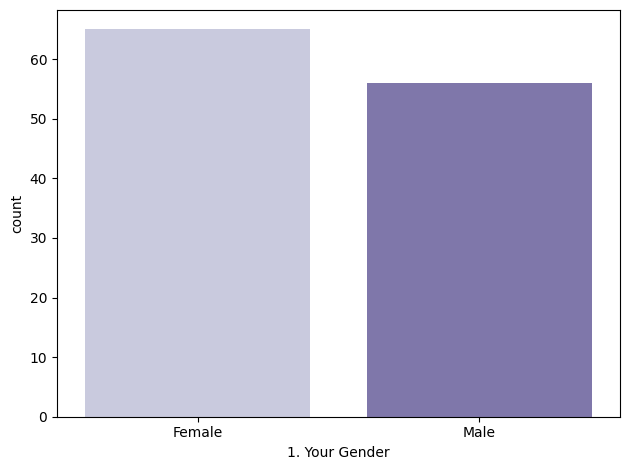

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import numpy as np
import re

# Chart Recommendation

def chart_recom(user_question, result_df):
    # Convert result DataFrame to string (truncate if very large)
    result_str = result_df.head(10).to_string(index=False)  # show up to 10 rows
    prompt = (
        f"You are a Business Intelligence Visualization Analyst. "
        f"The user asked: {user_question}\n"
        f"Here are the query results:\n{result_str}\n"
        "Recommend the most appropriate chart or visualization for these results (e.g., seaborn/matplotlib chart)"
    )
    return prompt

summary_prompt = chart_recom(user_question, result_df)
summary_and_chart = get_completion(summary_prompt, model="gpt-4o")

def extract_chart_type(gpt_response):
    chart_types = [
        'bar', 'line', 'scatter', 'histogram', 'box', 'box & whisker', 'violin',
        'treemap', 'heatmap', 'swarm', 'strip', 'bullet', 'packed bubble'
    ]
    for chart in chart_types:
        if re.search(rf"\b{re.escape(chart)}\b", gpt_response.lower()):
            return chart
    return None

# Main visualization function
def plot_flexible_chart(result_df, chart_type):
    plt.close('all')
    cols = result_df.columns.tolist()
    chart_type_lower = chart_type.lower() if chart_type else None

    # Map common chart names to seaborn/matplotlib functions
    chart_map = {
        "bar": lambda: sns.barplot(x=cols[0], y=cols[1], data=result_df, hue=cols[0], palette="Purples", legend=False),
        "line": lambda: sns.lineplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[4]),
        "scatter": lambda: sns.scatterplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[5]),
        "histogram": lambda: sns.histplot(result_df[cols[0]], color=sns.color_palette("Purples")[3]),
        "box": lambda: sns.boxplot(y=result_df[cols[0]], color=sns.color_palette("Purples")[6]),
        "box & whisker": lambda: sns.boxplot(y=result_df[cols[0]], color=sns.color_palette("Purples")[6]),
        "violin": lambda: sns.violinplot(y=result_df[cols[0]], color=sns.color_palette("Purples")[5]),
        "treemap": lambda: squarify.plot(
            sizes=result_df[cols[1]],
            label=result_df[cols[0]].astype(str),
            color=sns.color_palette("Purples", len(result_df))),
        "heatmap": lambda: sns.heatmap(result_df.corr(), annot=True, cmap="Purples"),
        "swarm": lambda: sns.swarmplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[5]),
        "strip": lambda: sns.stripplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[6])
    }

    # Try to plot if mapping exists and data shape fits
    try:
        if chart_type_lower in chart_map:
            chart_map[chart_type_lower]()
            plt.tight_layout()
            plt.show()
        else:
            print("No visuals recommended.")
    except Exception:
        print("No visuals recommended.")


chart_type = extract_chart_type(summary_and_chart)
if chart_type:
    plot_flexible_chart(result_df, chart_type)
else:
    print("No visuals recommended.")

## 4.Full Code

### Final Code with UI

<h2>👋 Welcome to HarrisX Research Chatbot!</h2><p>I’m here to help you explore customer survey data and generate insights.<br>Type your business question below to get started. For example:</p><ul><li>What is the percentage of female respondents?</li><li>How do students rate the price range?</li><li>What is average rating of the quality of Starbucks compared to other brands for different customer groups?</li></ul>

Enter your question here: What is average rating of the quality of Starbucks compared to other brands for different customer groups?


### **Generated SQL Query**

```sql
SELECT 
    "3. Are you currently....?" AS customer_group,
    AVG(CAST("12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:" AS FLOAT)) AS average_quality_rating
FROM 
    customer_survey
GROUP BY 
    "3. Are you currently....?";
```

### **SQL Query Result (top 10 rows):**

,customer_group,average_quality_rating
0,Employed,3.783333
1,Housewife,4.000000
2,Self-employed,3.705882
3,Student,3.523810


### **Summary & Key Insight**

The data provides insights into how different customer groups rate the quality of Starbucks compared to other brands. On average, housewives rate the quality of Starbucks the highest, with a score of 4.0. Employed individuals also have a relatively high average rating of 3.78. Self-employed customers give a slightly lower average rating of 3.71, while students rate the quality the lowest, with an average score of 3.52.

Key Insight: Starbucks appears to be most favored by housewives in terms of quality, while students are the least satisfied among the customer groups analyzed. This suggests that Starbucks may want to explore strategies to enhance its appeal to students, potentially by addressing their specific needs or preferences.

### **Visualization: Bar Chart**

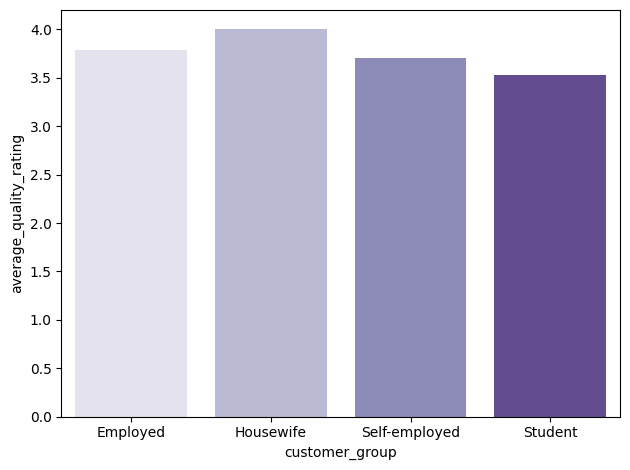

In [ ]:
from IPython.display import display, Markdown

# ----------- Visualization Function -----------
def plot_flexible_chart(result_df, chart_type):
    plt.close('all')
    cols = result_df.columns.tolist()
    chart_type_lower = chart_type.lower() if chart_type else None

    chart_map = {
        "bar": lambda: sns.barplot(x=cols[0], y=cols[1], data=result_df, hue=cols[0], palette="Purples", legend=False),
        "line": lambda: sns.lineplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[4]),
        "scatter": lambda: sns.scatterplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[5]),
        "histogram": lambda: sns.histplot(result_df[cols[0]], color=sns.color_palette("Purples")[3]),
        "box": lambda: sns.boxplot(y=result_df[cols[0]], color=sns.color_palette("Purples")[6]),
        "box & whisker": lambda: sns.boxplot(y=result_df[cols[0]], color=sns.color_palette("Purples")[6]),
        "violin": lambda: sns.violinplot(y=result_df[cols[0]], color=sns.color_palette("Purples")[5]),
        "treemap": lambda: squarify.plot(
            sizes=result_df[cols[1]] if np.issubdtype(result_df[cols[1]].dtype, np.number) else np.arange(1, len(result_df) + 1),
            label=result_df[cols[0]].astype(str),
            color=sns.color_palette("Purples", len(result_df))),
        "heatmap": lambda: sns.heatmap(result_df.corr(), annot=True, cmap="Purples"),
        "swarm": lambda: sns.swarmplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[5]),
        "strip": lambda: sns.stripplot(x=cols[0], y=cols[1], data=result_df, color=sns.color_palette("Purples")[6])
    }

    try:
        if chart_type_lower in chart_map:
            chart_map[chart_type_lower]()
            plt.tight_layout()
            plt.show()
        else:
            display(Markdown("No visuals recommended."))
    except Exception as e:
        display(Markdown(f"No visuals recommended. (Error: {e})"))


# ----------- Main Chatbot Flow -----------
#-----1.Prompt to SQL-------

display(Markdown(
    "<h2>👋 Welcome to HarrisX Research Chatbot!</h2>"
    "<p>I’m here to help you explore customer survey data and generate insights.<br>"
    "Type your business question below to get started. For example:</p>"
    "<ul>"
    "<li>What is the percentage of female respondents?</li>"
    "<li>How do students rate the price range?</li>"
    "<li>What is average rating of the quality of Starbucks compared to other brands for different customer groups?</li>"
    "</ul>"
))

user_question = input("Enter your question here: ")

def make_sql_prompt(user_question, table_name, columns):
    col_str = ', '.join([f'"{col}"' for col in columns])
    prompt = (
        f"You are a SQL expert. "
        f"Here is the schema for the table '{table_name}':\n"
        f"Columns: {col_str}\n"
        f"Based on this schema, write a SQL query to answer the following question:\n"
        f"{user_question}\n"
        "Return only the SQL code with clean formatting, without any markdown formatting or explanation."
    )
    return prompt

columns = list(df_01.columns)
sql_prompt = make_sql_prompt(user_question, "customer_survey", columns)
sql_query_response = get_completion(sql_prompt, model="gpt-4o")

import re
sql_query_clean = re.sub(r"^```[^\n]*\n", "", sql_query_response.strip())
sql_query_clean = re.sub(r"\n```$", "", sql_query_clean).strip()

display(Markdown("### **Generated SQL Query**"))
display(Markdown(f"```sql\n{sql_query_clean}\n```"))

try:
    result_df = pd.read_sql_query(sql_query_clean, conn)
    display(Markdown("### **SQL Query Result (top 10 rows):**"))
    display(result_df.head(10))
except Exception as e:
    display(Markdown(f"<span style='color:red'><b>Error running SQL:</b> {e}</span>"), raw=True)
    result_df = None

#-----2.SQL to Summary-------

if result_df is not None and not result_df.empty:
    def make_summary_prompt(user_question, result_df):
        result_str = result_df.to_string(index=False)
        prompt = (
            f"You are a data analyst. "
            f"The user asked: {user_question}\n"
            f"Here is the query result:\n{result_str}\n"
            "Summarize this result and the key insight in plain English for a business audience."
        )
        return prompt

    summary_prompt = make_summary_prompt(user_question, result_df)
    summary = get_completion(summary_prompt, model="gpt-4o")
    display(Markdown("### **Summary & Key Insight**"))
    # Display bullet points if present, otherwise show the first line
    lines = [line for line in summary.strip().split('\n') if line.strip()]
    if all(line.startswith("-") or line.startswith("*") for line in lines):
        display(Markdown('\n'.join(lines)))
    else:
        display(Markdown(summary.strip()))

    #-----3.Visualization-------

    def chart_recom(user_question, result_df):
        result_str = result_df.head(10).to_string(index=False)
        prompt = (
            f"You are a Business Intelligence Visualization Analyst. "
            f"The user asked: {user_question}\n"
            f"Here are the query results:\n{result_str}\n"
            "Recommend the most appropriate chart or visualization for these results (e.g., seaborn/matplotlib chart)"
        )
        return prompt

    summary_prompt = chart_recom(user_question, result_df)
    summary_and_chart = get_completion(summary_prompt, model="gpt-4o")

    def extract_chart_type(gpt_response):
        chart_types = [
            'bar', 'line', 'scatter', 'histogram', 'box', 'box & whisker', 'violin',
            'treemap', 'heatmap', 'swarm', 'strip', 'bullet', 'packed bubble'
        ]
        for chart in chart_types:
            if re.search(rf"\b{re.escape(chart)}\b", gpt_response.lower()):
                return chart
        return None

    chart_type = extract_chart_type(summary_and_chart)
    if chart_type:
        display(Markdown(f"### **Visualization: {chart_type.title()} Chart**"))
        plot_flexible_chart(result_df, chart_type)
    else:
        display(Markdown("No visuals recommended."))
else:
    display(Markdown("No results to summarize or visualize."))